In [1]:
import matplotlib
import matplotlib.pyplot as plt
import mplhep
import pickle
import numpy as np
from pathlib import Path

plt.style.use(mplhep.style.ROOT)

In [2]:
histDict = {}
with open("/home/ram2aq/data/scaling_hists.pkl", "rb") as fp:
    histDict = pickle.load(fp)
    
all_materials = [mat for mat in histDict.keys()]
all_masses = [mass for mass in histDict[all_materials[0]]]
all_var_names = [var for var in histDict[all_materials[0]][all_masses[0]]]
all_base_energies = [baseE for baseE in histDict[all_materials[0]][all_masses[0]][all_var_names[0]]]

print(all_materials, all_masses, all_var_names, all_base_energies)

['copper', 'lead', 'oxygen', 'silicon', 'tungsten'] [0.005, 0.01, 0.05, 0.1] ['recoil_energy_frac', 'ap_energy_frac', 'recoil_theta', 'ap_theta', 'delta_phi', 'angle_recoil_ap'] [1.0, 2.0, 4.0, 6.0]


In [3]:
def make_hists_for_params(material, mass, var_name, base_energy, xlabel, ylabel, logX=False, logY=False, 
                          ylim_raw=None, ylim_unscaled_ratio=None, ylim_scaled_ratio=None,
                          base_linewidth=2, other_linewidth=1, compEs_filter_out=[], fig_height=900, fig_width=1350):
    baseEVals, bins, compEs, compEVals_unscaled, compEVals_scaled = histDict[material][mass][var_name][base_energy]
    
    height_inches = fig_height / matplotlib.rcParams["figure.dpi"]
    width_inches = fig_width / matplotlib.rcParams["figure.dpi"]
    
    figureName = "{material}_mA_{mass}_baseE_{base_energy}_{var_name}".format(
        material=material,
        mass=mass,
        base_energy=base_energy,
        var_name=var_name
    )
    
    unscaled_raw, unscaled_ratio = plt.figure(figureName + "_unscaled", figsize=(width_inches, height_inches)
                                             ).subplots(ncols = 1, nrows = 2, sharex = "col", 
                                                gridspec_kw = dict(hspace = 0.1, 
                                                                   height_ratios = [3,1], 
                                                                   left = 0.08, right = 0.63,
                                                                   top = 0.99, bottom = 0.09))
    #plt.figure(var_name + "unscaled").subplots_adjust(hspace = 0.1)
    legend_title = "Electrons on {material}\n$m_{{A\'}} = {mass}$ GeV".format(
        material=material, mass=mass
    )

    if logX:
        unscaled_raw.set_xscale('log')
        unscaled_ratio.set_xscale('log')
    if logY:
        unscaled_raw.set_yscale('log')
        unscaled_ratio.ticklabel_format(style='plain')
    unscaled_raw.set_ylabel(ylabel)
    if ylim_raw is not None:
        unscaled_raw.set_ylim(ylim_raw)
    # plot the base energy in black
    unscaled_raw.hist(bins[:-1], bins, weights=baseEVals,
                      histtype='step', color='black', linewidth=base_linewidth,
                      label='unscaled MG at {base_energy} GeV'.format(base_energy=base_energy))
    # plot the other energies
    for i, compE in enumerate(compEs):
        if compE in compEs_filter_out:
            continue
        unscaled_raw.hist(bins[:-1], bins, weights=compEVals_unscaled[i],
                          histtype='step', linewidth=other_linewidth,
                          label='unscaled MG at {comp_energy} GeV'.format(comp_energy=compE))

    unscaled_ratio.set_xlabel(xlabel)
    unscaled_ratio.set_ylabel("Higher E / Base E", loc='center', fontsize='small')
    if ylim_unscaled_ratio is not None:
        unscaled_ratio.set_ylim(ylim_unscaled_ratio)
    # add horizontal line at 1
    unscaled_ratio.axhline(1., color='black', linewidth=base_linewidth)
    # plot the ratios
    for i, compE in enumerate(compEs):
        if compE in compEs_filter_out:
            continue
        unscaled_ratio.hist(bins[:-1], bins, weights=np.divide(compEVals_unscaled[i], baseEVals, 
                                                               out=np.zeros_like(compEVals_unscaled[i]), 
                                                               where=baseEVals!=0),
                            histtype='step', linewidth=other_linewidth, label='_nolegend_')
    
    plt.figure(figureName + "_unscaled").legend(title=legend_title,
                                             bbox_to_anchor=(0.63, 0.5), loc="center left")
    
    scaled_raw, scaled_ratio = plt.figure(figureName + "_scaled", figsize=(width_inches, height_inches)
                                             ).subplots(ncols = 1, nrows = 2, sharex = "col", 
                                                gridspec_kw = dict(hspace = 0.1, 
                                                                   height_ratios = [3,1], 
                                                                   left = 0.08, right = 0.63,
                                                                   top = 0.99, bottom = 0.09))

    if logX:
        scaled_raw.set_xscale('log')
        scaled_ratio.set_xscale('log')
    if logY:
        scaled_raw.set_yscale('log')
        scaled_ratio.ticklabel_format(style='plain')
    scaled_raw.set_ylabel(ylabel)
    if ylim_raw is not None:
        scaled_raw.set_ylim(ylim_raw)
    # plot the base energy in black
    scaled_raw.hist(bins[:-1], bins, weights=baseEVals,
                      histtype='step', color='black', linewidth=base_linewidth,
                      label='unscaled MG at {base_energy} GeV'.format(base_energy=base_energy))
    # plot the other energies
    for i, compE in enumerate(compEs):
        if compE in compEs_filter_out:
            continue
        scaled_raw.hist(bins[:-1], bins, weights=compEVals_scaled[i],
                        histtype='step', linewidth=other_linewidth,
                        label='scaled from {comp_energy} GeV'.format(comp_energy=compE))
    scaled_ratio.set_xlabel(xlabel)
    scaled_ratio.set_ylabel("Scaled / Unscaled", loc='center', fontsize='small')
    if ylim_scaled_ratio is not None:
        scaled_ratio.set_ylim(ylim_scaled_ratio)
    # add horizontal line at 1
    scaled_ratio.axhline(1., color='black')
    # plot the ratios
    for i, compE in enumerate(compEs):
        if compE in compEs_filter_out:
            continue
        scaled_ratio.hist(bins[:-1], bins, weights=np.divide(compEVals_scaled[i], baseEVals,
                                                             out=np.zeros_like(compEVals_unscaled[i]), 
                                                             where=baseEVals!=0),
                          histtype='step', linewidth=other_linewidth, label='_nolegend_')
        
    plt.figure(figureName + "_scaled").legend(title=legend_title,
                                           bbox_to_anchor=(0.63, 0.5), loc="center left")
        
    return (plt.figure(figureName + "_unscaled"), plt.figure(figureName + "_scaled"))

In [25]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'recoil_energy_frac',
                      1.0, 'Outgoing Electron Energy Fraction', 
                      'Fraction below Outgoing Energy',
                      compEs_filter_out=[3.0, 4.0],
                      ylim_unscaled_ratio=(0.9, 1.1),
                      ylim_scaled_ratio=(0.9, 1.1))

        plots_path = '/home/ram2aq/plots/recoil_energy_frac/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_1.0_recoil_energy_frac_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_1.0_recoil_energy_frac_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

In [32]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'ap_energy_frac',
                      1.0, '$A\'$ Energy Fraction', 
                      'Fraction below Outgoing Energy',
                      compEs_filter_out=[3.0, 4.0],
                      ylim_unscaled_ratio=(0.9, 1.1),
                      ylim_scaled_ratio=(0.9, 1.1),
                      logY=True)

        plots_path = '/home/ram2aq/plots/ap_energy_frac/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_1.0_ap_energy_frac_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_1.0_ap_energy_frac_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

In [33]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'recoil_theta',
                      1.0, 'Outgoing Electron Angle [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[3.0, 4.0],
                      ylim_unscaled_ratio=(0.9, 1.1),
                      ylim_scaled_ratio=(0.9, 1.1),
                      logY=True)

        plots_path = '/home/ram2aq/plots/recoil_theta/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_1.0_recoil_theta_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_1.0_recoil_theta_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

In [7]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'ap_theta',
                      1.0, '$A\'$ $\\theta$ [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[3.0, 4.0],
                      ylim_unscaled_ratio=(0.8, 1.2),
                      ylim_scaled_ratio=(0.8, 1.2),
                      logY=True)

        plots_path = '/home/ram2aq/plots/ap_theta/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_1.0_ap_theta_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_1.0_ap_theta_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

In [22]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'delta_phi',
                      1.0, '$|\Delta_{{\phi,e,A\'}}|$ [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[3.0, 4.0],
                      ylim_unscaled_ratio=(0.8, 1.2),
                      ylim_scaled_ratio=(0.8, 1.2))

        plots_path = '/home/ram2aq/plots/delta_phi/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_1.0_delta_phi_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_1.0_delta_phi_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

#make_hists_for_params('oxygen', 0.1, 'delta_phi',
#                      1.0, '$|\Delta_{{\phi,e,A\'}}|$ [rad]', 
#                      'Normalized Rate',
#                      compEs_filter_out=[3.0, 4.0],
#                      ylim_unscaled_ratio=(0.8, 1.2),
#                      ylim_scaled_ratio=(0.8, 1.2)
#                     )

In [23]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'angle_recoil_ap',
                      1.0, 'Angle between $A\'$ and Electron [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[3.0, 4.0],
                      ylim_unscaled_ratio=(0.8, 1.2),
                      ylim_scaled_ratio=(0.8, 1.2))

        plots_path = '/home/ram2aq/plots/angle_recoil_ap/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_1.0_angle_recoil_ap_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_1.0_angle_recoil_ap_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

In [11]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'recoil_energy_frac',
                      2.0, 'Outgoing Electron Energy Fraction', 
                      'Fraction below Outgoing Energy',
                      compEs_filter_out=[2.5, 3.0, 4.0],
                      ylim_unscaled_ratio=(0.9, 1.1),
                      ylim_scaled_ratio=(0.9, 1.1))

        plots_path = '/home/ram2aq/plots/recoil_energy_frac/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_2.0_recoil_energy_frac_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_2.0_recoil_energy_frac_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

In [12]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'ap_energy_frac',
                      2.0, '$A\'$ Energy Fraction', 
                      'Fraction below Outgoing Energy',
                      compEs_filter_out=[2.5, 3.0, 4.0],
                      ylim_unscaled_ratio=(0.9, 1.1),
                      ylim_scaled_ratio=(0.9, 1.1),
                      logY=True)

        plots_path = '/home/ram2aq/plots/ap_energy_frac/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_2.0_ap_energy_frac_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_2.0_ap_energy_frac_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

In [13]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'recoil_theta',
                      2.0, 'Outgoing Electron Angle [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[2.5, 3.0, 4.0],
                      ylim_unscaled_ratio=(0.9, 1.1),
                      ylim_scaled_ratio=(0.9, 1.1),
                      logY=True)

        plots_path = '/home/ram2aq/plots/recoil_theta/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_2.0_recoil_theta_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_2.0_recoil_theta_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

(<Figure size 1350x900 with 2 Axes>, <Figure size 1350x900 with 2 Axes>)

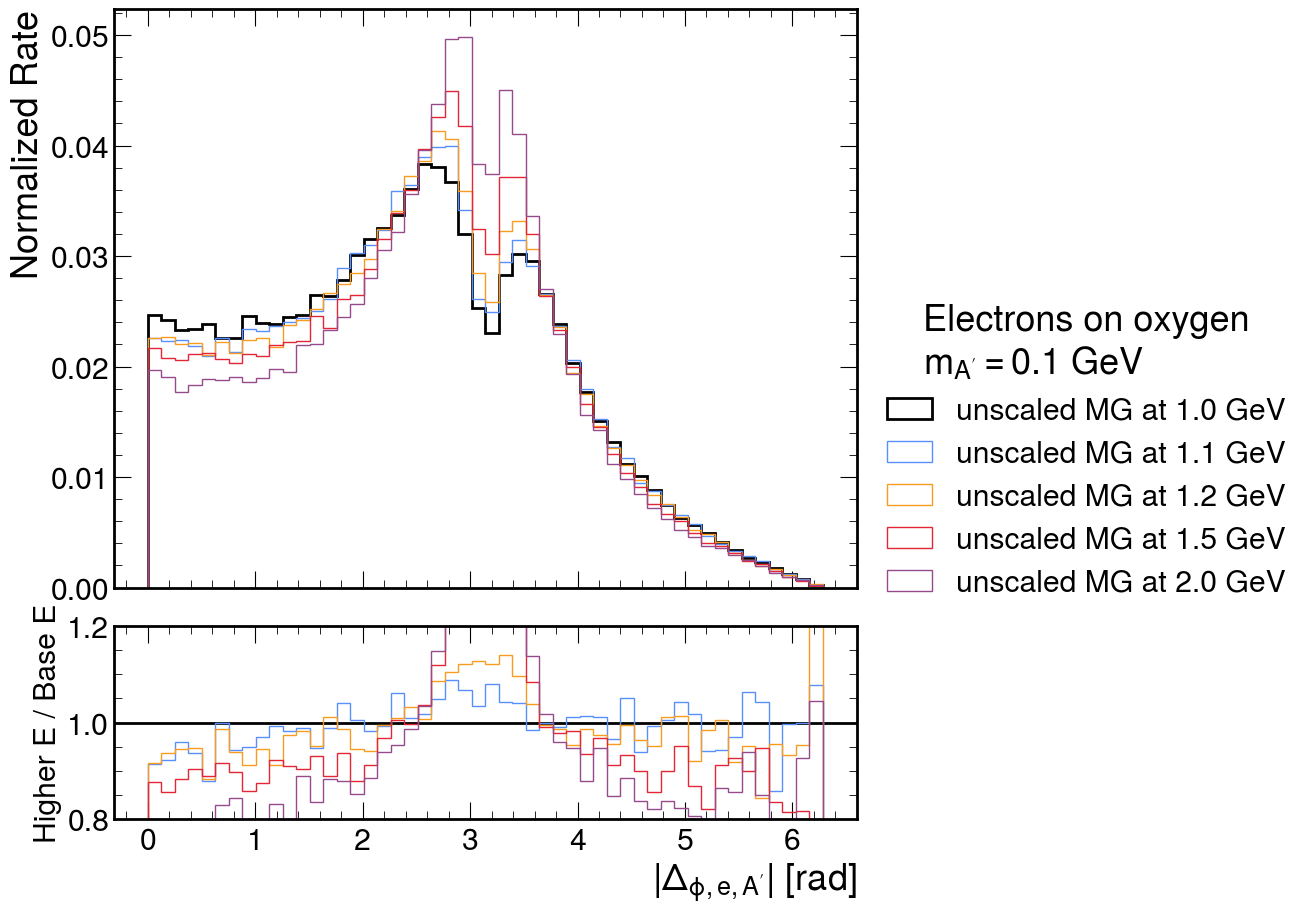

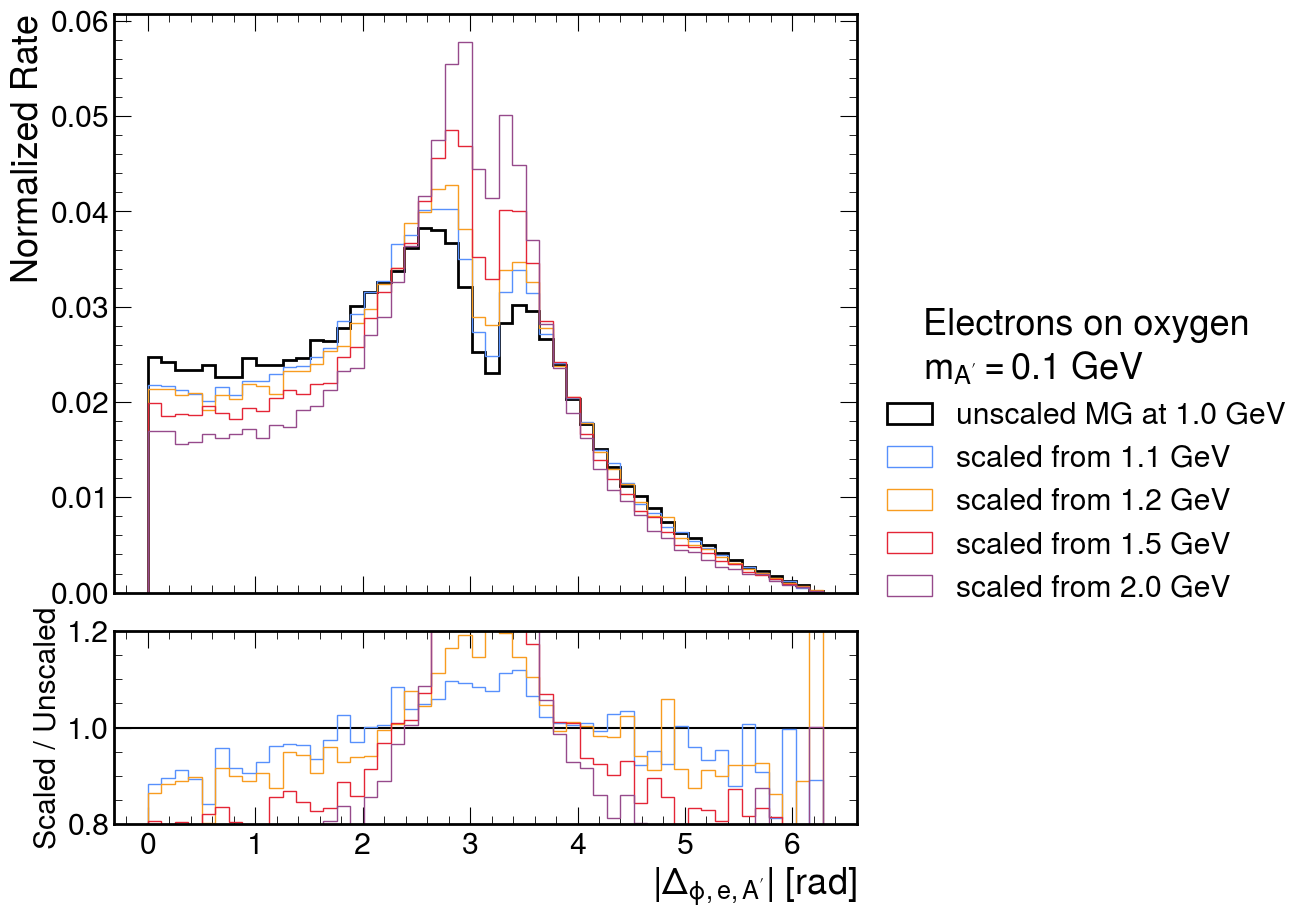

In [15]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'ap_theta',
                      2.0, '$A\'$ $\\theta$ [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[2.5, 3.0, 4.0],
                      ylim_unscaled_ratio=(0.8, 1.2),
                      ylim_scaled_ratio=(0.8, 1.2),
                      logY=True)

        plots_path = '/home/ram2aq/plots/ap_theta/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_2.0_ap_theta_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_2.0_ap_theta_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

In [19]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'delta_phi',
                      2.0, '$|\Delta_{{\phi,e,A\'}}|$ [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[2.5, 3.0, 4.0],
                      ylim_unscaled_ratio=(0.8, 1.2),
                      ylim_scaled_ratio=(0.8, 1.2))

        plots_path = '/home/ram2aq/plots/delta_phi/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_2.0_delta_phi_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_2.0_delta_phi_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

#make_hists_for_params('tungsten', 0.1, 'delta_phi',
#                      2.0, '$|\Delta_{{\phi,e,A\'}}|$ [rad]', 
#                      'Normalized Rate',
#                      compEs_filter_out=[2.5, 3.0, 4.0],
#                      ylim_unscaled_ratio=(0.8, 1.2),
#                      ylim_scaled_ratio=(0.8, 1.2)
#                     )

In [16]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'angle_recoil_ap',
                      2.0, 'Angle between $A\'$ and Electron [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[2.5, 3.0, 4.0],
                      ylim_unscaled_ratio=(0.8, 1.2),
                      ylim_scaled_ratio=(0.8, 1.2),
                      logY=True)

        plots_path = '/home/ram2aq/plots/angle_recoil_ap/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_2.0_angle_recoil_ap_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_2.0_angle_recoil_ap_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

In [17]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'recoil_energy_frac',
                      4.0, 'Outgoing Electron Energy Fraction', 
                      'Fraction below Outgoing Energy',
                      compEs_filter_out=[7.0, 8.0],
                      ylim_unscaled_ratio=(0.9, 1.1),
                      ylim_scaled_ratio=(0.9, 1.1))

        plots_path = '/home/ram2aq/plots/recoil_energy_frac/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_4.0_recoil_energy_frac_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_4.0_recoil_energy_frac_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

#make_hists_for_params('tungsten', 0.1, 'recoil_energy_frac',
#                      4.0, 'Outgoing Electron Energy Fraction', 
#                      'Fraction below Outgoing Energy',
#                      compEs_filter_out=[7.0, 8.0],
#                      ylim_unscaled_ratio=(0.97, 1.1),
#                      ylim_scaled_ratio=(0.9, 1.05)
#                     )

In [18]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'ap_energy_frac',
                      4.0, '$A\'$ Energy Fraction', 
                      'Fraction below Outgoing Energy',
                      compEs_filter_out=[7.0, 8.0],
                      ylim_unscaled_ratio=(0.9, 1.1),
                      ylim_scaled_ratio=(0.9, 1.1),
                      logY=True)

        plots_path = '/home/ram2aq/plots/ap_energy_frac/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_4.0_ap_energy_frac_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_4.0_ap_energy_frac_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

#make_hists_for_params('tungsten', 0.1, 'ap_energy_frac',
#                      4.0, '$A\'$ Energy Fraction', 
#                      'Fraction below Outgoing Energy',
#                      compEs_filter_out=[7.0, 8.0],
#                      ylim_unscaled_ratio=(0.9, 1.1),
#                      ylim_scaled_ratio=(0.9, 1.1),
#                      logY=True
#                     )

In [19]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'recoil_theta',
                      4.0, 'Outgoing Electron Angle [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[7.0, 8.0],
                      ylim_unscaled_ratio=(0.9, 1.1),
                      ylim_scaled_ratio=(0.9, 1.1),
                      logY=True)

        plots_path = '/home/ram2aq/plots/recoil_theta/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_4.0_recoil_theta_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_4.0_recoil_theta_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

#make_hists_for_params('tungsten', 0.1, 'recoil_theta',
#                      4.0, 'Outgoing Electron Angle [rad]', 
#                      'Normalized Rate',
#                      compEs_filter_out=[7.0, 8.0],
#                      ylim_unscaled_ratio=(0.8, 1.2),
#                      ylim_scaled_ratio=(0.8, 1.2),
#                      logY=True)

In [20]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'ap_theta',
                      4.0, '$A\'$ $\\theta$ [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[7.0, 8.0],
                      ylim_unscaled_ratio=(0.8, 1.2),
                      ylim_scaled_ratio=(0.8, 1.2),
                      logY=True)

        plots_path = '/home/ram2aq/plots/ap_theta/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_4.0_ap_theta_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_4.0_ap_theta_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

#make_hists_for_params('tungsten', 0.1, 'ap_theta',
#                      4.0, '$A\'$ $\\theta$ [rad]', 
#                      'Normalized Rate',
#                      compEs_filter_out=[7.0, 8.0],
#                      ylim_unscaled_ratio=(0.8, 1.2),
#                      ylim_scaled_ratio=(0.8, 1.2),
#                      logY=True
#                     )

In [21]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'delta_phi',
                      4.0, '$|\Delta_{{\phi,e,A\'}}|$ [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[7.0, 8.0],
                      ylim_unscaled_ratio=(0.8, 1.2),
                      ylim_scaled_ratio=(0.8, 1.2))

        plots_path = '/home/ram2aq/plots/delta_phi/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_4.0_delta_phi_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_4.0_delta_phi_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

#make_hists_for_params('tungsten', 0.1, 'delta_phi',
#                      4.0, '$|\Delta_{{\phi,e,A\'}}$| [rad]', 
#                      'Normalized Rate',
#                      compEs_filter_out=[7.0, 8.0],
#                      ylim_unscaled_ratio=(0.8, 1.2),
#                      ylim_scaled_ratio=(0.8, 1.2)
#                     )

In [14]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'angle_recoil_ap',
                      4.0, 'Angle between $A\'$ and Electron [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[7.0, 8.0],
                      ylim_unscaled_ratio=(0.8, 1.2),
                      ylim_scaled_ratio=(0.8, 1.2),
                      logY=True)

        plots_path = '/home/ram2aq/plots/angle_recoil_ap/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_4.0_angle_recoil_ap_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_4.0_angle_recoil_ap_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

#make_hists_for_params('tungsten', 0.1, 'angle_recoil_ap',
#                      4.0, 'Angle between $A\'$ and Electron [rad]', 
#                      'Normalized Rate',
#                      compEs_filter_out=[7.0, 8.0],
#                      ylim_unscaled_ratio=(0.8, 1.2),
#                      ylim_scaled_ratio=(0.8, 1.2),
#                      logY=True
#                     )

In [21]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'recoil_energy_frac',
                      6.0, 'Outgoing Electron Energy Fraction', 
                      'Fraction below Outgoing Energy',
                      compEs_filter_out=[6.06, 6.12, 6.18, 6.24, 6.9, 7.5],
                      ylim_unscaled_ratio=(0.9, 1.1),
                      ylim_scaled_ratio=(0.9, 1.1))

        plots_path = '/home/ram2aq/plots/recoil_energy_frac/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_6.0_recoil_energy_frac_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_6.0_recoil_energy_frac_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

#make_hists_for_params('tungsten', 0.1, 'recoil_energy_frac',
#                      6.0, 'Outgoing Electron Energy Fraction', 
#                      'Fraction below Outgoing Energy',
#                      compEs_filter_out=[6.06, 6.12, 6.18, 6.24, 6.9, 7.5],
#                      ylim_unscaled_ratio=(0.97, 1.1),
#                      ylim_scaled_ratio=(0.9, 1.05)
#                     )

In [22]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'ap_energy_frac',
                      6.0, '$A\'$ Energy Fraction', 
                      'Fraction below Outgoing Energy',
                      compEs_filter_out=[6.06, 6.12, 6.18, 6.24, 6.9, 7.5],
                      ylim_unscaled_ratio=(0.9, 1.1),
                      ylim_scaled_ratio=(0.9, 1.1),
                      logY=True)

        plots_path = '/home/ram2aq/plots/ap_energy_frac/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_6.0_ap_energy_frac_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_6.0_ap_energy_frac_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

#make_hists_for_params('tungsten', 0.1, 'ap_energy_frac',
#                      6.0, '$A\'$ Energy Fraction', 
#                      'Fraction below Outgoing Energy',
#                      compEs_filter_out=[6.06, 6.12, 6.18, 6.24, 6.9, 7.5],
#                      ylim_unscaled_ratio=(0.9, 1.1),
#                      ylim_scaled_ratio=(0.9, 1.1),
#                      logY=True
#                     )

In [23]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'recoil_theta',
                      6.0, 'Outgoing Electron Angle [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[6.06, 6.12, 6.18, 6.24, 6.9, 7.5],
                      ylim_unscaled_ratio=(0.9, 1.1),
                      ylim_scaled_ratio=(0.9, 1.1),
                      logY=True)

        plots_path = '/home/ram2aq/plots/recoil_theta/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_6.0_recoil_theta_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_6.0_recoil_theta_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

#make_hists_for_params('tungsten', 0.1, 'recoil_theta',
#                      6.0, 'Outgoing Electron Angle [rad]', 
#                      'Normalized Rate',
#                      compEs_filter_out=[6.06, 6.12, 6.18, 6.24, 6.9, 7.5],
#                      ylim_unscaled_ratio=(0.8, 1.2),
#                      ylim_scaled_ratio=(0.8, 1.2),
#                      logY=True)

In [15]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'ap_theta',
                      6.0, '$A\'$ $\\theta$ [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[6.06, 6.12, 6.18, 6.24, 6.9, 7.5],
                      ylim_unscaled_ratio=(0.8, 1.2),
                      ylim_scaled_ratio=(0.8, 1.2),
                      logY=True)

        plots_path = '/home/ram2aq/plots/ap_theta/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_6.0_ap_theta_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_6.0_ap_theta_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

#make_hists_for_params('tungsten', 0.1, 'ap_theta',
#                      6.0, '$A\'$ $\\theta$ [rad]', 
#                      'Normalized Rate',
#                      compEs_filter_out=[6.06, 6.12, 6.18, 6.24, 6.9, 7.5],
#                      ylim_unscaled_ratio=(0.8, 1.2),
#                      ylim_scaled_ratio=(0.8, 1.2),
#                      logY=True
#                     )

In [18]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'delta_phi',
                      6.0, '$|\Delta_{{\phi,e,A\'}}|$ [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[6.06, 6.12, 6.18, 6.24, 6.9, 7.5],
                      ylim_unscaled_ratio=(0.8, 1.2),
                      ylim_scaled_ratio=(0.8, 1.2))

        plots_path = '/home/ram2aq/plots/delta_phi/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_6.0_delta_phi_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_6.0_delta_phi_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

#make_hists_for_params('tungsten', 0.1, 'delta_phi',
#                      6.0, '$|\Delta_{{\phi,e,A\'}}|$ [rad]', 
#                      'Normalized Rate',
#                      compEs_filter_out=[6.06, 6.12, 6.18, 6.24, 6.9, 7.5],
#                      ylim_unscaled_ratio=(0.8, 1.2),
#                      ylim_scaled_ratio=(0.8, 1.2)
#                     )

In [17]:
for material in all_materials:
    for mass in all_masses:
        fig_unscaled, fig_scaled = make_hists_for_params(
                      material, mass, 'angle_recoil_ap',
                      6.0, 'Angle between $A\'$ and Electron [rad]', 
                      'Normalized Rate',
                      compEs_filter_out=[6.06, 6.12, 6.18, 6.24, 6.9, 7.5],
                      ylim_unscaled_ratio=(0.8, 1.2),
                      ylim_scaled_ratio=(0.8, 1.2),
                      logY=True)

        plots_path = '/home/ram2aq/plots/angle_recoil_ap/{material}/mA_{mass}'.format(material=material, mass=mass)
        Path(plots_path).mkdir(parents=True, exist_ok=True)
        fig_unscaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_6.0_angle_recoil_ap_unscaled.png'.format(material=material, mass=mass))
        fig_scaled.savefig(plots_path + '/electron_{material}_mA_{mass}_baseE_6.0_angle_recoil_ap_scaled.png'.format(material=material, mass=mass))
        plt.close(fig_unscaled)
        plt.close(fig_scaled)
        del fig_unscaled
        del fig_scaled

#make_hists_for_params('tungsten', 0.1, 'angle_recoil_ap',
#                      6.0, 'Angle between $A\'$ and Electron [rad]', 
#                      'Normalized Rate',
#                      compEs_filter_out=[6.06, 6.12, 6.18, 6.24, 6.9, 7.5],
#                      ylim_unscaled_ratio=(0.8, 1.2),
#                      ylim_scaled_ratio=(0.8, 1.2),
#                      logY=True
#                     )